# Imports

In [1]:
#Pointing custom import path taken from #https://stackoverflow.com/questions/53049195/importing-custom-module-into-jupyter-notebook
import sys
sys.path.append('../modules/')
import eda
import matplotlib.pyplot as plt

In [2]:
#setting a random Seed
import numpy as np
np.random.seed(42)
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)

# Loading in data

In [3]:
#specify if we want to use the train data or test data
dataset = 'Training'

In [4]:
folders = eda.folders(dataset)
folders

['glioma', 'meningioma', 'notumor', 'pituitary']

glioma has 1321 files


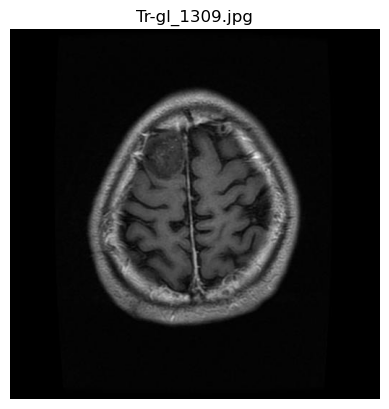

meningioma has 1339 files


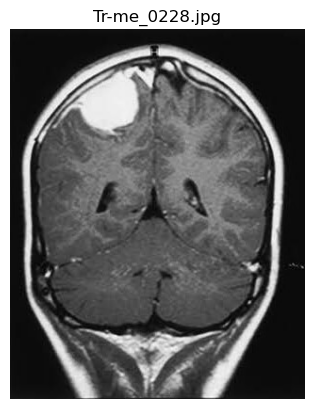

notumor has 1595 files


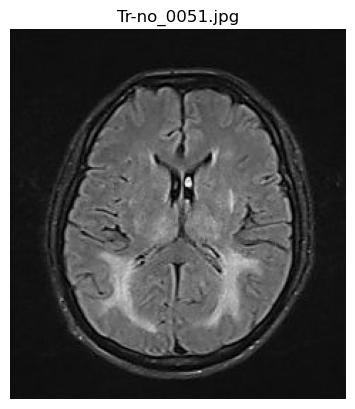

pituitary has 1457 files


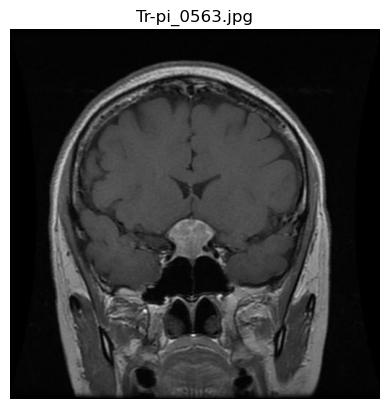

In [5]:
eda.image_len(dataset, folders)

# Average pixel value
This portion was heavily inspired by this [notebook](https://github.com/DerikVo/DSI_project_4_plant_disease/blob/main/notebooks/01_Potato_PlantVillageEDA.ipynb) was originally developed by chat GPT 4 wih the prompt:  "I have an image data set that I want to do EDA on. How can I average out the pixel values of all the images in a class. python keras" and was adapted to fit code base.

Found 1457 images belonging to 1 classes.


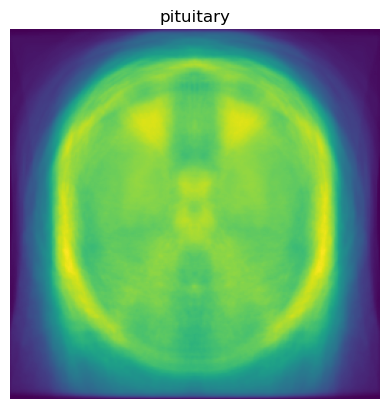

In [6]:
pituitary_tumor = eda.avg_images(dataset, 'pituitary')
plt.title('pituitary')
plt.axis('off')
plt.imshow(pituitary_tumor);

Found 1339 images belonging to 1 classes.


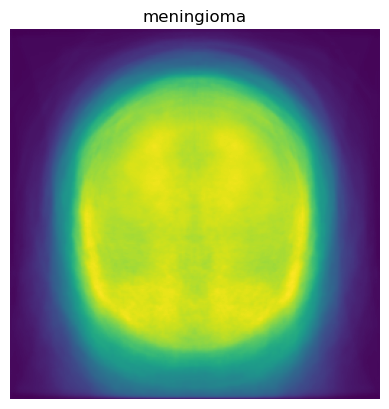

In [7]:
meningioma_tumor = eda.avg_images(dataset, f'meningioma')
plt.title(f'meningioma')
plt.axis('off')
plt.imshow(meningioma_tumor);

Found 1321 images belonging to 1 classes.


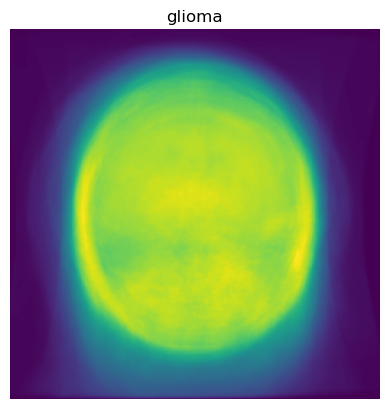

In [8]:
glioma_tumor = eda.avg_images(dataset, f'glioma')
plt.title(f'glioma')
plt.axis('off')
plt.imshow(glioma_tumor);

Found 1595 images belonging to 1 classes.


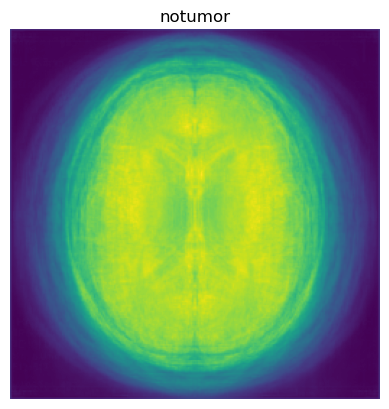

In [9]:
notumor = eda.avg_images(dataset, f'notumor')
plt.title(f'notumor')
plt.axis('off')
plt.imshow(notumor);